In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
# Directly loading data through library

# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_iris

# # save load_iris() sklearn dataset to iris
# # if you'd like to check dataset type use: type(load_iris())
# # if you'd like to view list of attributes use: dir(load_iris())
# iris = load_iris()

# # np.c_ is the numpy concatenate function
# # which is used to concat iris['data'] and iris['target'] arrays 
# # for pandas column argument: concat iris['feature_names'] list
# # and string list (in this case one string); you can make this anything you'd like..  
# # the original dataset would probably call this ['Species']
# data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])

In [6]:
ls

 Volume in drive F is COLLEGE
 Volume Serial Number is 14C4-D5AB

 Directory of F:\BE\DA\Assignment1

27-07-2021  14:36    <DIR>          .
27-07-2021  14:36    <DIR>          ..
20-07-2021  14:38    <DIR>          .ipynb_checkpoints
27-07-2021  14:34           122,040 Assignment 1.ipynb
22-07-2021  11:43             5,107 Iris.csv
               2 File(s)        127,147 bytes
               3 Dir(s)  214,611,460,096 bytes free


In [60]:
iris = pd.read_csv('Iris.csv')

In [61]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


## Feautres 

#### There are 5 features

#### Type of data:
<br>
SepalLengthCm-Numerical<br>
SepalWidthCm-Numerical<br>
PetalLengthCm-Numerical<br>
PetalWidthCm-Numerical<br>
Species-Categorical<br>

## Summary statistics 

In [63]:
iris = iris.drop(columns=['Id'])

In [64]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1) Mean & Median

In [66]:
iris.groupby('Species').agg(['mean', 'median'])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

### 2) Minimum & Maximum Value

In [67]:
iris.min()

SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [68]:
iris.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [69]:
iris.groupby('Species').min()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [70]:
iris.groupby('Species').max()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


### 3) Standard Deviation

In [71]:
iris.groupby('Species').std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


### 4) Variance

In [72]:
iris.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

In [73]:
iris.groupby('Species').var()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


### 5) Co-relation

In [74]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Histogram

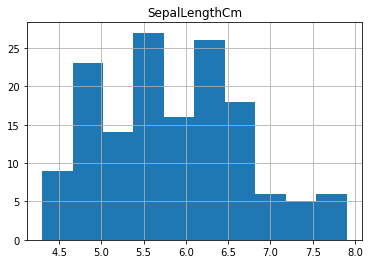

In [75]:
hist = iris.hist(column = 'SepalLengthCm')

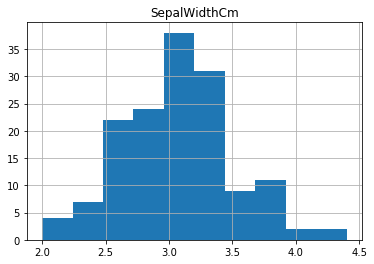

In [76]:
hist = iris.hist(column = 'SepalWidthCm')

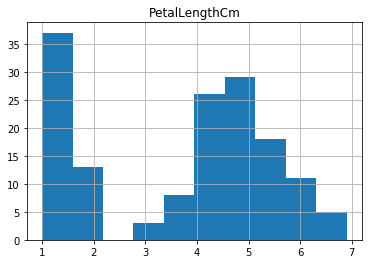

In [77]:
hist = iris.hist(column = 'PetalLengthCm')

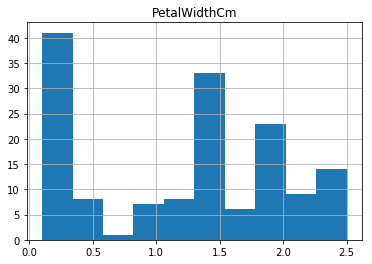

In [78]:
hist = iris.hist(column = 'PetalWidthCm')

## Boxplot

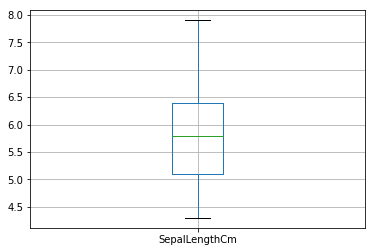

In [79]:
boxplot = iris.boxplot(column=['SepalLengthCm'])

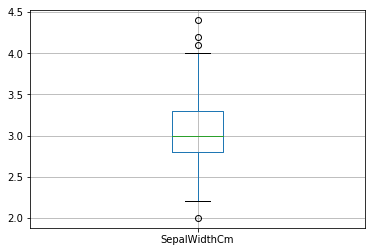

In [80]:
boxplot = iris.boxplot(column=['SepalWidthCm'])

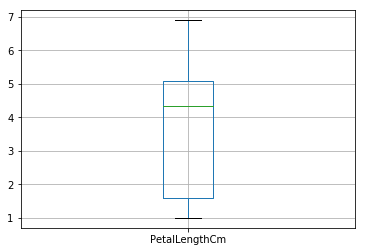

In [81]:
boxplot = iris.boxplot(column=['PetalLengthCm'])

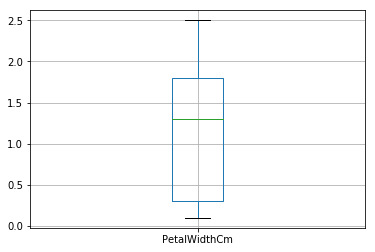

In [82]:
boxplot = iris.boxplot(column=['PetalWidthCm'])

In [83]:
col = list(iris.columns)

In [84]:
col

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [85]:
col.remove('Species')

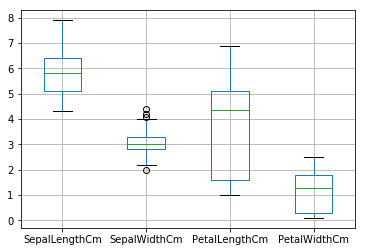

In [86]:
boxplot = iris.boxplot(column=col)

In [88]:
print(np.where(iris['SepalWidthCm']>4))

(array([15, 32, 33], dtype=int64),)


In [89]:
print(np.where(iris['SepalWidthCm']<2.5))

(array([ 41,  53,  57,  60,  62,  68,  80,  81,  87,  93, 119], dtype=int64),)


In [93]:
iris_new = iris.drop(columns = 'Species')

In [94]:
#Z Score
z = np.abs(stats.zscore(iris_new))
print(z)

[[9.00681170e-01 1.03205722e+00 1.34127240e+00 1.31297673e+00]
 [1.14301691e+00 1.24957601e-01 1.34127240e+00 1.31297673e+00]
 [1.38535265e+00 3.37848329e-01 1.39813811e+00 1.31297673e+00]
 [1.50652052e+00 1.06445364e-01 1.28440670e+00 1.31297673e+00]
 [1.02184904e+00 1.26346019e+00 1.34127240e+00 1.31297673e+00]
 [5.37177559e-01 1.95766909e+00 1.17067529e+00 1.05003079e+00]
 [1.50652052e+00 8.00654259e-01 1.34127240e+00 1.18150376e+00]
 [1.02184904e+00 8.00654259e-01 1.28440670e+00 1.31297673e+00]
 [1.74885626e+00 3.56360566e-01 1.34127240e+00 1.31297673e+00]
 [1.14301691e+00 1.06445364e-01 1.28440670e+00 1.44444970e+00]
 [5.37177559e-01 1.49486315e+00 1.28440670e+00 1.31297673e+00]
 [1.26418478e+00 8.00654259e-01 1.22754100e+00 1.31297673e+00]
 [1.26418478e+00 1.24957601e-01 1.34127240e+00 1.44444970e+00]
 [1.87002413e+00 1.24957601e-01 1.51186952e+00 1.44444970e+00]
 [5.25060772e-02 2.18907205e+00 1.45500381e+00 1.31297673e+00]
 [1.73673948e-01 3.11468391e+00 1.28440670e+00 1.050030

In [95]:
iris_new = iris_new[(z < 3).all(axis=1)]

In [100]:
print(iris.shape)
print(iris_new.shape)

(150, 5)
(149, 4)


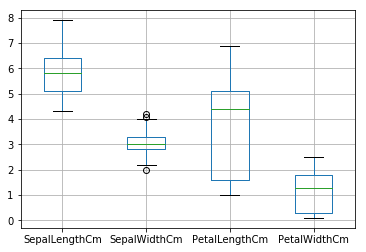

In [101]:
col = list(iris_new.columns)
boxplot = iris_new.boxplot(column=col)

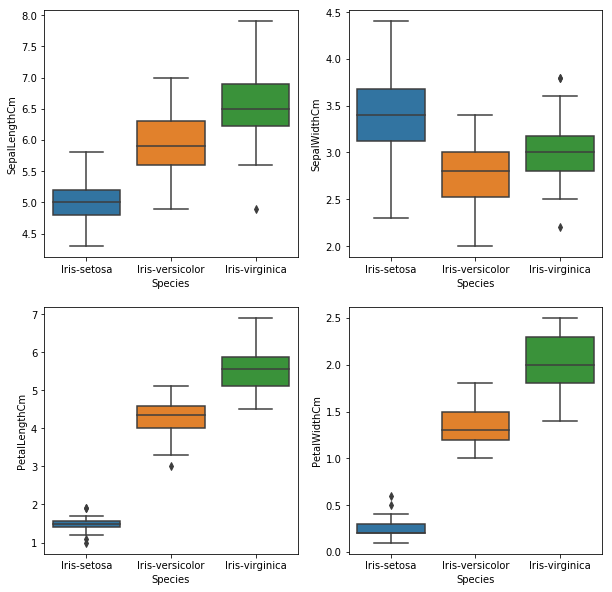

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.boxplot(x="Species", y="SepalLengthCm", data=iris, ax=axes[0,0])
sns.boxplot(x="Species", y="SepalWidthCm", data=iris, ax=axes[0,1])
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, ax=axes[1,0])
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, ax=axes[1,1])

# NEW DATASET

In [11]:
ls

 Volume in drive F is COLLEGE
 Volume Serial Number is 14C4-D5AB

 Directory of F:\BE\DA\Assignment1

27-07-2021  14:38    <DIR>          .
27-07-2021  14:38    <DIR>          ..
20-07-2021  14:38    <DIR>          .ipynb_checkpoints
27-07-2021  14:38           149,127 Assignment 1.ipynb
22-07-2021  11:43             5,107 Iris.csv
27-07-2021  14:38           525,187 water_potability.csv
               3 File(s)        679,421 bytes
               3 Dir(s)  214,610,898,944 bytes free


In [12]:
water = pd.read_csv('water_potability.csv')

In [13]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [16]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
water.dropna(inplace=True)
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [19]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


## Summary statistics 

In [21]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [22]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


### 1) Mean & Median

In [23]:
water.agg(['mean', 'median'])

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
median,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000


### 2) Minimum & Maximum Value

In [24]:
water.min()

ph                   0.227499
Hardness            73.492234
Solids             320.942611
Chloramines          1.390871
Sulfate            129.000000
Conductivity       201.619737
Organic_carbon       2.200000
Trihalomethanes      8.577013
Turbidity            1.450000
Potability           0.000000
dtype: float64

In [25]:
water.max()

ph                    14.000000
Hardness             317.338124
Solids             56488.672413
Chloramines           13.127000
Sulfate              481.030642
Conductivity         753.342620
Organic_carbon        27.006707
Trihalomethanes      124.000000
Turbidity              6.494749
Potability             1.000000
dtype: float64

### 3) Standard Deviation

In [27]:
water.std()

ph                    1.573337
Hardness             32.635085
Solids             8642.239815
Chloramines           1.584820
Sulfate              41.205172
Conductivity         80.712572
Organic_carbon        3.324959
Trihalomethanes      16.077109
Turbidity             0.780346
Potability            0.490678
dtype: float64

### 4) Variance

In [28]:
water.var()

ph                 2.475388e+00
Hardness           1.065049e+03
Solids             7.468831e+07
Chloramines        2.511654e+00
Sulfate            1.697866e+03
Conductivity       6.514519e+03
Organic_carbon     1.105535e+01
Trihalomethanes    2.584734e+02
Turbidity          6.089401e-01
Potability         2.407653e-01
dtype: float64

### 5) Co-relation

In [29]:
water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


## Histogram

In [31]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

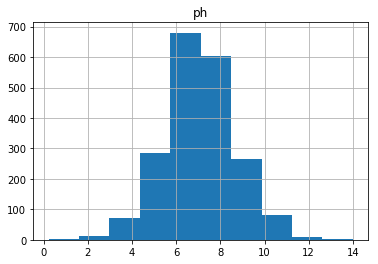

In [32]:
hist = water.hist(column = 'ph')

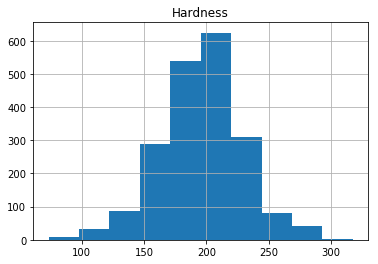

In [33]:
hist = water.hist(column = 'Hardness')

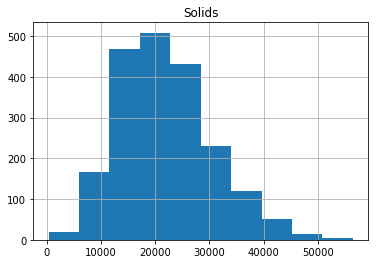

In [34]:
hist = water.hist(column = 'Solids')

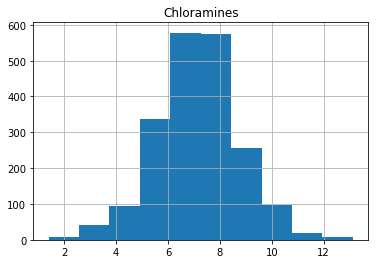

In [35]:
hist = water.hist(column = 'Chloramines')

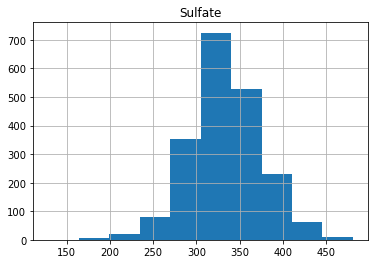

In [36]:
hist = water.hist(column = 'Sulfate')

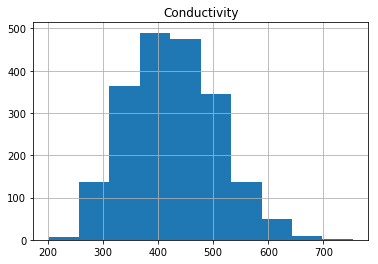

In [37]:
hist = water.hist(column = 'Conductivity')

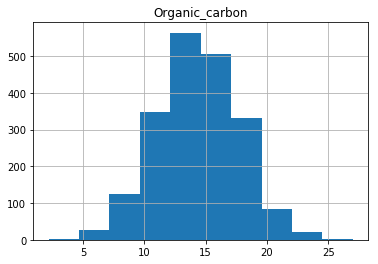

In [38]:
hist = water.hist(column = 'Organic_carbon')

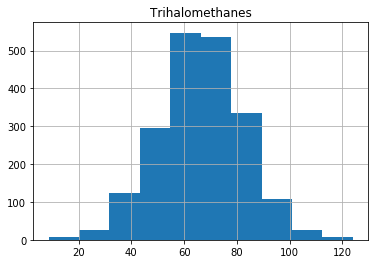

In [39]:
hist = water.hist(column = 'Trihalomethanes')

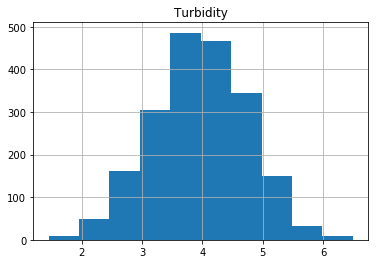

In [40]:
hist = water.hist(column = 'Turbidity')

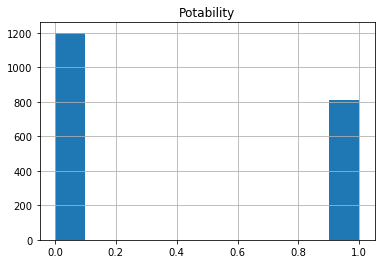

In [41]:
hist = water.hist(column = 'Potability')

## Boxplot

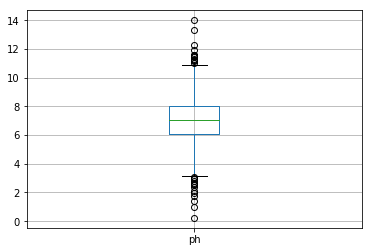

In [42]:
boxplot = water.boxplot(column=['ph'])

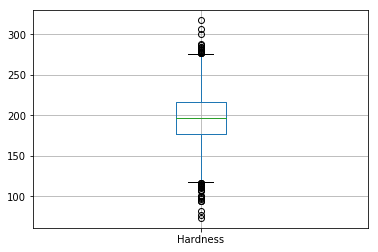

In [43]:
boxplot = water.boxplot(column=['Hardness'])

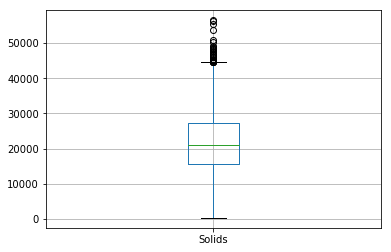

In [44]:
boxplot = water.boxplot(column=['Solids'])

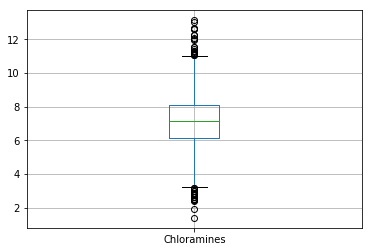

In [45]:
boxplot = water.boxplot(column=['Chloramines'])

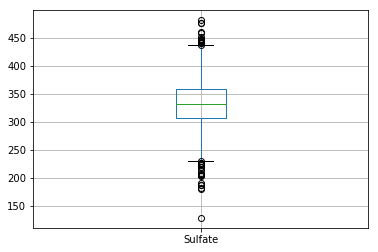

In [46]:
boxplot = water.boxplot(column=['Sulfate'])

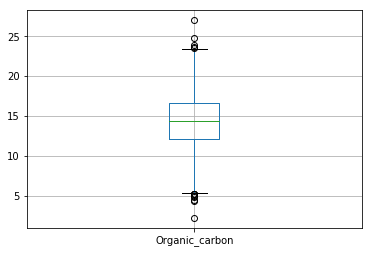

In [47]:
boxplot = water.boxplot(column=['Organic_carbon'])

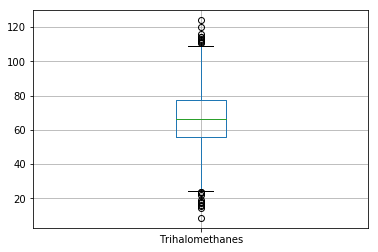

In [48]:
boxplot = water.boxplot(column=['Trihalomethanes'])

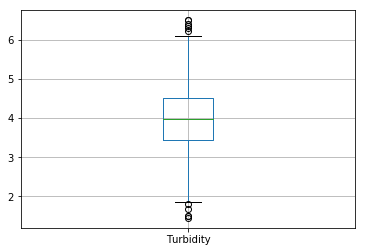

In [49]:
boxplot = water.boxplot(column=['Turbidity'])

In [87]:
col = list(water.columns)

In [88]:
col

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [89]:
col.remove('Potability')

In [90]:
col

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

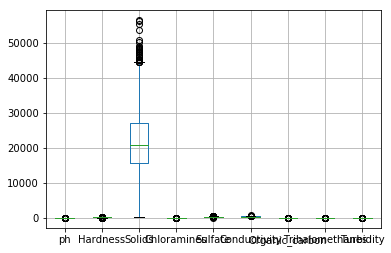

In [91]:
boxplot = water.boxplot(column=col)

In [92]:
water_new = water.drop(columns = 'Potability')

In [93]:
#Z Score
z = np.abs(stats.zscore(water_new))
print(z)

[[0.7824658  0.56411376 0.01168692 ... 1.22703167 2.11165179 0.84476056]
 [1.27546291 0.45565257 0.45583491 ... 0.84215371 2.14039865 0.13503344]
 [0.95483488 0.23461412 0.7906452  ... 1.79234008 0.7144228  1.80736621]
 ...
 [2.8004919  3.10036538 1.76750279 ... 0.54602107 1.5455849  0.51212515]
 [0.64615977 0.28531709 0.48857575 ... 0.6889287  0.3721083  0.3845623 ]
 [1.53717226 0.07007504 2.9702871  ... 0.139372   0.01784567 0.59743748]]


In [94]:
water_new = water_new[(z < 3).all(axis=1)]

In [95]:
print(water.shape)
print(water_new.shape)

(2011, 10)
(1929, 9)


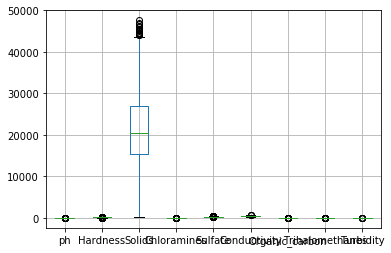

In [96]:
boxplot = water_new.boxplot(column=col)